In [2]:
!pip install ultralytics --quiet



image 1/1 /kaggle/input/khaycom/khaycom/z6582829869655_eac62a63a000c596d91fe9f2adbe29d4.jpg: 640x480 1 spoon, 2 bowls, 125.1ms
Speed: 3.2ms preprocess, 125.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


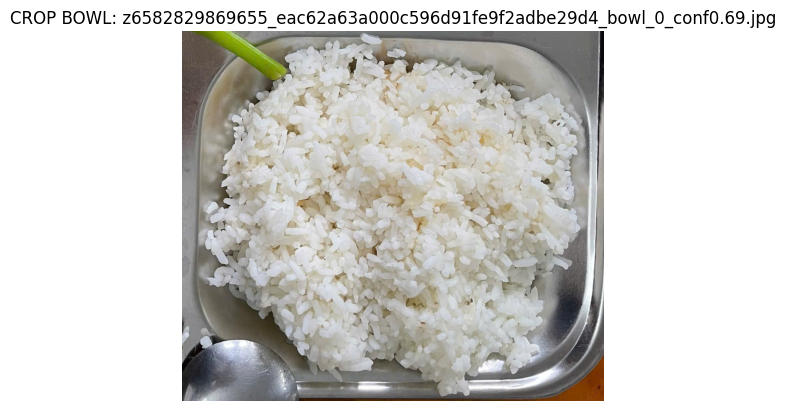

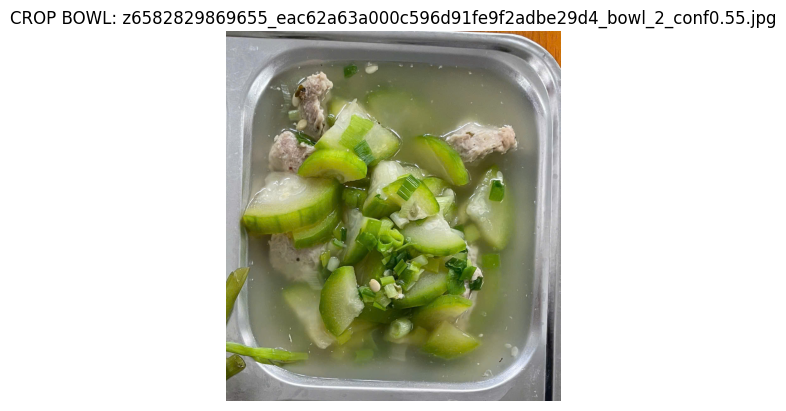


image 1/1 /kaggle/working/bowls_cropped/z6582829869655_eac62a63a000c596d91fe9f2adbe29d4_bowl_2_conf0.55.jpg: 640x608 1 canhcai, 1033.7ms
Speed: 3.7ms preprocess, 1033.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


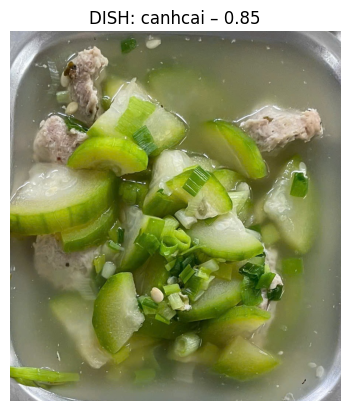


image 1/1 /kaggle/working/bowls_cropped/z6582829869655_eac62a63a000c596d91fe9f2adbe29d4_bowl_0_conf0.69.jpg: 576x640 1 com, 951.9ms
Speed: 5.0ms preprocess, 951.9ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


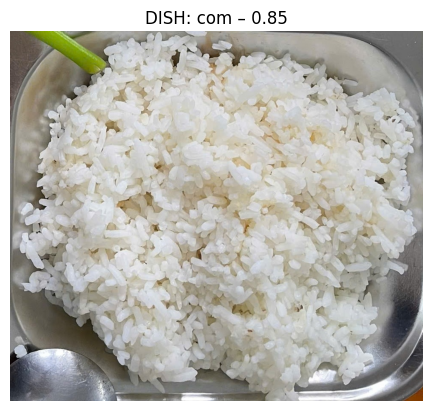

In [11]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
from ultralytics import YOLO
from ultralytics.utils import SETTINGS

os.environ['YOLO_CACHE_DIR'] = '/kaggle/working/yolo_cache'
SETTINGS.update({'runs_dir': '/kaggle/working/ultralytics_logs'})

shutil.rmtree("/kaggle/working/bowls_cropped", ignore_errors=True)
shutil.rmtree("/kaggle/working/dishes_cropped", ignore_errors=True)
os.makedirs("/kaggle/working/bowls_cropped", exist_ok=True)
os.makedirs("/kaggle/working/dishes_cropped", exist_ok=True)

# Copy model detect bowl (YOLOv11n)
bowl_model_src = "/kaggle/input/ai-model/yolo11n.pt"
bowl_model_dst = "/kaggle/working/yolo11n.pt"
shutil.copy(bowl_model_src, bowl_model_dst)
bowl_model = YOLO(bowl_model_dst)

# Copy model detect dish (YOLOv8)
dish_model_src = "/kaggle/input/ai-model/model.pt"
dish_model_dst = "/kaggle/working/best.pt"
shutil.copy(dish_model_src, dish_model_dst)
dish_model = YOLO(dish_model_dst)

# Ảnh khay ăn đầu vào 
image_path = "/kaggle/input/khaycom/khaycom/z6582829869655_eac62a63a000c596d91fe9f2adbe29d4.jpg"
image_name = os.path.splitext(os.path.basename(image_path))[0]
img = cv2.imread(image_path)

# Detect từ ảnh gốc
bowl_crop_dir = "/kaggle/working/bowls_cropped"
results = bowl_model.predict(source=image_path, conf=0.3)

for i, r in enumerate(results):
    for j, box in enumerate(r.boxes):
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        class_name = bowl_model.names[cls_id].lower()

        if "bowl" not in class_name:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]
        crop_name = f"{image_name}_bowl_{j}_conf{conf:.2f}.jpg"
        crop_path = os.path.join(bowl_crop_dir, crop_name)
        cv2.imwrite(crop_path, crop)

        plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
        plt.title(f"CROP BOWL: {crop_name}")
        plt.axis("off")
        plt.show()

#  Detect dish từ từng ảnh tô đã crop
dish_crop_dir = "/kaggle/working/dishes_cropped"
for fname in os.listdir(bowl_crop_dir):
    if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    bowl_path = os.path.join(bowl_crop_dir, fname)
    bowl_img = cv2.imread(bowl_path)
    bowl_name = os.path.splitext(fname)[0]

    results = dish_model.predict(source=bowl_path, conf=0.3)

    for i, r in enumerate(results):
        for j, box in enumerate(r.boxes):
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            class_name = dish_model.names[cls_id]

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            crop = bowl_img[y1:y2, x1:x2]
            crop_name = f"{bowl_name}_dish_{class_name}_{j}_conf{conf:.2f}.jpg"
            crop_path = os.path.join(dish_crop_dir, crop_name)
            cv2.imwrite(crop_path, crop)
            
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            plt.title(f"DISH: {class_name} – {conf:.2f}")
            plt.axis("off")
            plt.show()

In [17]:
pip install gradio 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install gradio 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 24.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import json
from PIL import Image

# ✅ Tắt GPU nếu cần
tf.config.set_visible_devices([], 'GPU')

# ✅ Load model CNN và file menu
cnn_model = load_model("/kaggle/input/ai-model/best_food_model.keras")
with open("/kaggle/input/thucdon/thucdon.json", "r", encoding="utf-8") as f:
    menu = json.load(f)

class_names = [item["ten_mon"] for item in menu]

# ✅ Thư mục chứa ảnh món ăn đã crop từ bước YOLO detect dish
dish_dir = "/kaggle/working/dishes_cropped"

# ✅ Hàm xử lý toàn bộ ảnh
def process_all_dishes(dummy_input):  # dummy_input để khớp với nút Gradio
    results = []
    total_price = 0
    dish_images = []

    for fname in sorted(os.listdir(dish_dir)):
        if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(dish_dir, fname)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        pred = cnn_model.predict(img_array, verbose=0)
        cls_index = np.argmax(pred)
        cls_name = class_names[cls_index]
        price = menu.get(cls_name, 0)
        total_price += price

        results.append((cls_name, price))
        dish_images.append((Image.open(img_path), f"{cls_name} – {price:,} VND"))

    # 🧾 Tạo hóa đơn
    receipt = "===== 🧾 BILL =====\n"
    for name, price in results:
        receipt += f"{name:15} | {price:,} VND\n"
    receipt += "-----------------------------\n"
    receipt += f"TỔNG TIỀN : {total_price:,} VND"

    # ✅ Trả về kết quả
    if dish_images:
        imgs, labels = zip(*dish_images)
    else:
        imgs, labels = [], []

    label_text = "\n".join(labels)
    return list(imgs), label_text, receipt

# ✅ Giao diện Gradio chạy tốt trên Kaggle
demo = gr.Interface(
    fn=process_all_dishes,
    inputs=gr.Button("🔍 Nhận Diện Tất Cả Món"),
    outputs=[
        gr.Gallery(label="Ảnh các món ăn", columns=3, height="auto"),
        gr.Textbox(label="Tên món & giá từng ảnh", lines=6),
        gr.Textbox(label="Hóa đơn tổng kết", lines=10)
    ],
    title="🍽️ HỆ THỐNG NHẬN DIỆN MÓN ĂN CĂN TIN",
    description="Nhấn nút để quét toàn bộ ảnh trong /kaggle/working/dishes_cropped, phân loại món ăn bằng CNN và in tổng hóa đơn từ menu.json"
)

demo.launch(debug=False, share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://f14d241a9ba886627f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2147, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1665, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

In [19]:
import gradio as gr
import cv2
import numpy as np
import tensorflow as tf
from ultralytics import YOLO

# Load models
yolo_model = YOLO("yolov8n.pt")
interpreter = tf.lite.Interpreter(model_path="/kaggle/input/model-cnn/model_cnn.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Class labels & prices
class_names = ["Ca hu kho", "Canh cai", "Canh chua", "Com trang", "Dau hu sot ca",
               "Ga chien", "Rau muong xao", "Thit kho", "Thit kho trung", "Trung chien"]
food_prices = dict(zip(class_names, [10000, 8000, 8000, 5000, 7000, 12000, 6000, 12000, 14000, 7000]))

def classify_image(image):
    detections = yolo_model(image)[0].boxes.data.cpu().numpy()
    predicted_classes, total_price = [], 0

    for x1, y1, x2, y2, score, class_id in detections:
        if score < 0.3: continue
        crop = image[int(y1):int(y2), int(x1):int(x2)]
        if crop.size == 0: continue
        input_data = np.expand_dims(cv2.resize(crop, (224, 224)).astype(np.float32) / 255.0, axis=0)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        pred_idx = int(np.argmax(interpreter.get_tensor(output_details[0]['index'])))
        label = class_names[pred_idx]
        predicted_classes.append(label)
        total_price += food_prices.get(label, 0)

    if not predicted_classes:
        return "Không phát hiện được món ăn", 0
    result_text = "\n".join([f"{food}: {food_prices[food]:,}đ" for food in predicted_classes])
    return result_text, f"{total_price:,}đ"

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🍱 Nhận diện món ăn & Tính tiền")
    image_input = gr.Image(type="numpy", label="Tải ảnh mâm cơm")
    food_output = gr.Textbox(label="Các món ăn và giá", lines=10)
    total_output = gr.Textbox(label="Tổng tiền")
    gr.Button("Dự đoán và tính tiền").click(classify_image, inputs=image_input, outputs=[food_output, total_output])

demo.launch()


* Running on local URL:  http://127.0.0.1:7864
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://f445024e020cc040d3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 640x480 3 bowls, 1 dining table, 174.3ms
Speed: 6.8ms preprocess, 174.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 knife, 3 bowls, 1 cake, 1 dining table, 190.7ms
Speed: 4.3ms preprocess, 190.7ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 knife, 3 bowls, 180.8ms
Speed: 3.7ms preprocess, 180.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
